In [18]:
# Load the Company Bankruptcy training Data 

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Comment this if the data visualisations doesn't work on your side
#%matplotlib inline

#plt.style.use('bmh')

# Load the raining set and peek into the data 
train_data = pd.read_csv('company-bankruptcy-pred.csv', error_bad_lines=False, warn_bad_lines=False)

train_data.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [20]:
train_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [21]:
# Let's see any non nulls etc
train_data.isnull().any()
train_data[train_data.isna().any(axis=1)]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

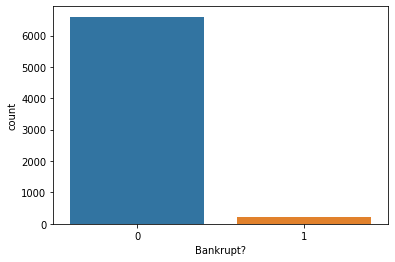

In [22]:
# Let's Ana;yze target value, is BankRupt or not, "BankRupt?" column 

sns.countplot('Bankrupt?',data=train_data)


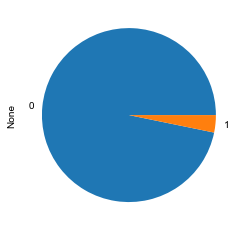

In [23]:
# Pie Plot of "BankRupt?" column 
train_data.groupby('Bankrupt?').size().plot(kind = 'pie') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

In [24]:
train_data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

As we can see the data is heavily biased, which is normal for this kind of business use case.
What this means is that, very few companies go bankrupt, which is a healthy economic indicator.

In [10]:
# Let's see Box Plots of the features, non scaled 
train_data.plot(kind='box',subplots=True, layout=(10,10), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(150,150)})
plt.show()


Box PLot shows, there are a bunch of outliers, so feature scaling would be Good.

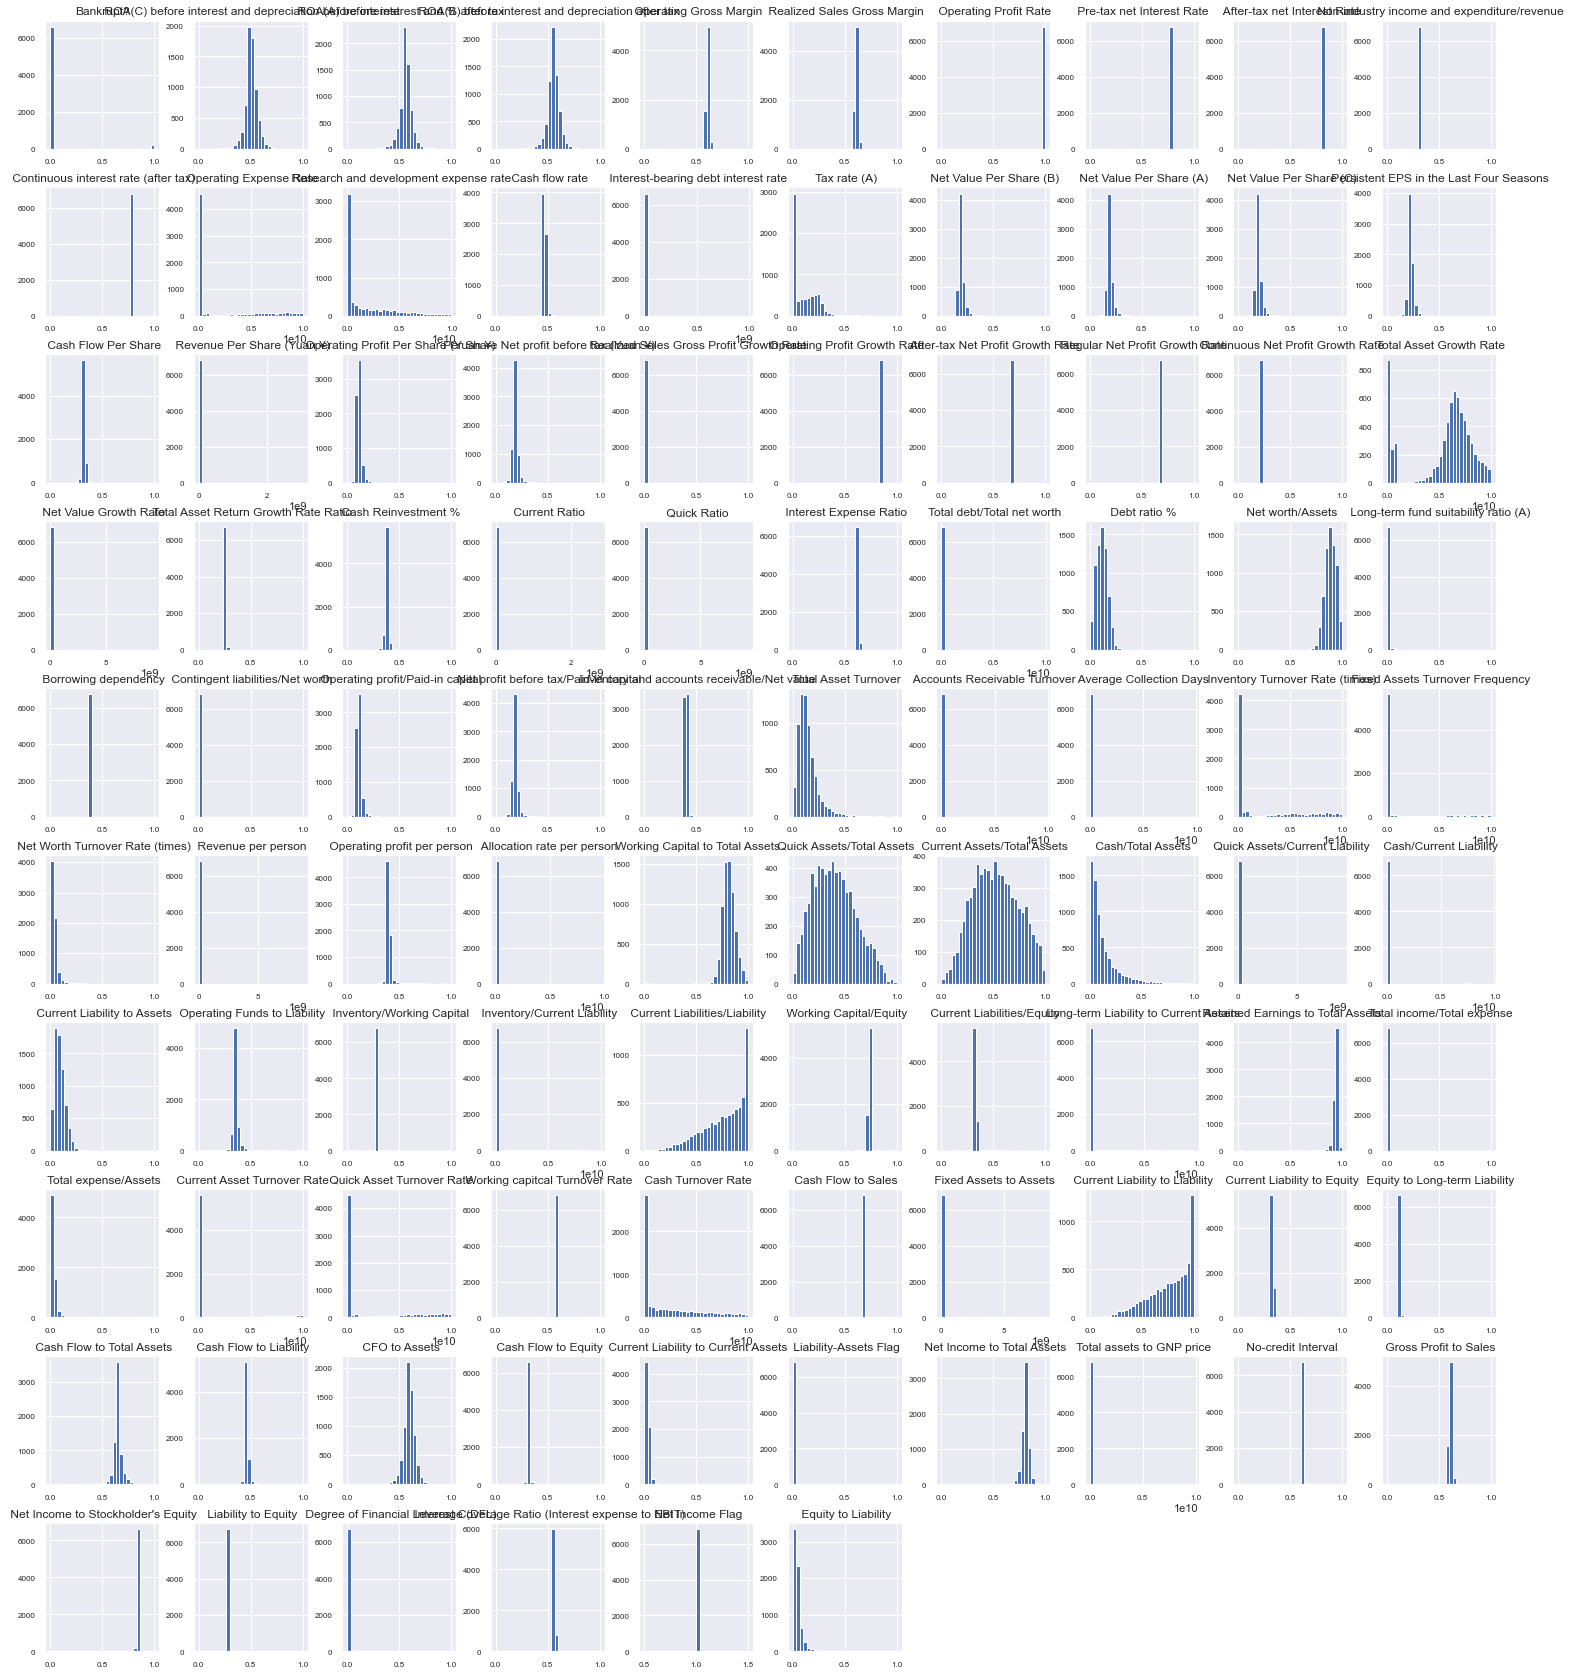

In [11]:
# Histogram of features
#train_data.hist(figsize=(50, 50), bins=50, xlabelsize=8, ylabelsize=8); 
train_data.hist(figsize=(26, 30), bins=30, xlabelsize=8, ylabelsize=8); 

In [25]:
# Correlation Matrix with target value

cor_matrix = train_data.corr().abs()   
cor_matrix.style.background_gradient(sns.light_palette('green', as_cmap=True))


Some features show High correlation with Target to be preicted variable (is Bankrupt), which is a good thing.
But there are a few strongly correlated features, for Example ROA (A), ROA (B) and ROA(C) have a very strong correlation among themselevs.
Let's clean highly correlated features.

In [26]:
#Dropping highly correlated data, correl > 0.9 

upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) 

dropped_cols = set()
for feature in upper_triangle.columns:
    if any(upper_triangle[feature] > 0.9): #more than 0.9 corr. coeficient -> dropped
        dropped_cols.add(feature)

print("There are %d dropped columns" %len(dropped_cols))

train_data_uptd = train_data.drop(dropped_cols, axis=1)
#train_data_uptd.head()

There are 19 dropped columns


In [27]:
train_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [28]:
train_data_uptd.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,...,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.607948,0.998755,0.303623,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,...,0.315582,0.031506,0.001173,1.862942e+07,0.623915,0.840402,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.016934,0.013010,0.011163,3.237684e+09,2.598292e+09,0.017036,1.082750e+08,0.138667,...,0.012961,0.030845,0.034234,3.764501e+08,0.012290,0.014523,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.600445,0.998969,0.303466,1.566874e-04,1.281880e-04,0.461558,2.030203e-04,0.000000,...,0.312995,0.018034,0.000000,9.036205e-04,0.623636,0.840115,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.605997,0.999022,0.303525,2.777589e-04,5.090000e+08,0.465080,3.210321e-04,0.073489,...,0.314953,0.027597,0.000000,2.085213e-03,0.623879,0.841179,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.613914,0.999095,0.303585,4.145000e+09,3.450000e+09,0.471004,5.325533e-04,0.205841,...,0.317707,0.038375,0.000000,5.269777e-03,0.624168,0.842357,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,9.990000e+09,9.980000e+09,1.000000,9.900000e+08,1.000000,...,1.000000,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


One more thing we noticed from the EDA we have done. The data is very imbaalanced, with very few companies going bankrupt. So if a classifier just predcist no Bankruptcy (0), it will get a very highaccuracy of 6599/(6599+230) = 0.968, more than 96% accuracy.
So for a better model we would need to balance the tarining data set a little, by SMOTE technique.
SMOTE balances the data by generating syntheic data, and we will show the pie chart of the target variabe after SMOTE.

In [29]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


random_st = 1234

#defining features and target variable
x = train_data_uptd.drop('Bankrupt?', axis=1)
y = train_data_uptd['Bankrupt?']

# Scale or Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split Scaled data into Train and Test sets 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=random_st)



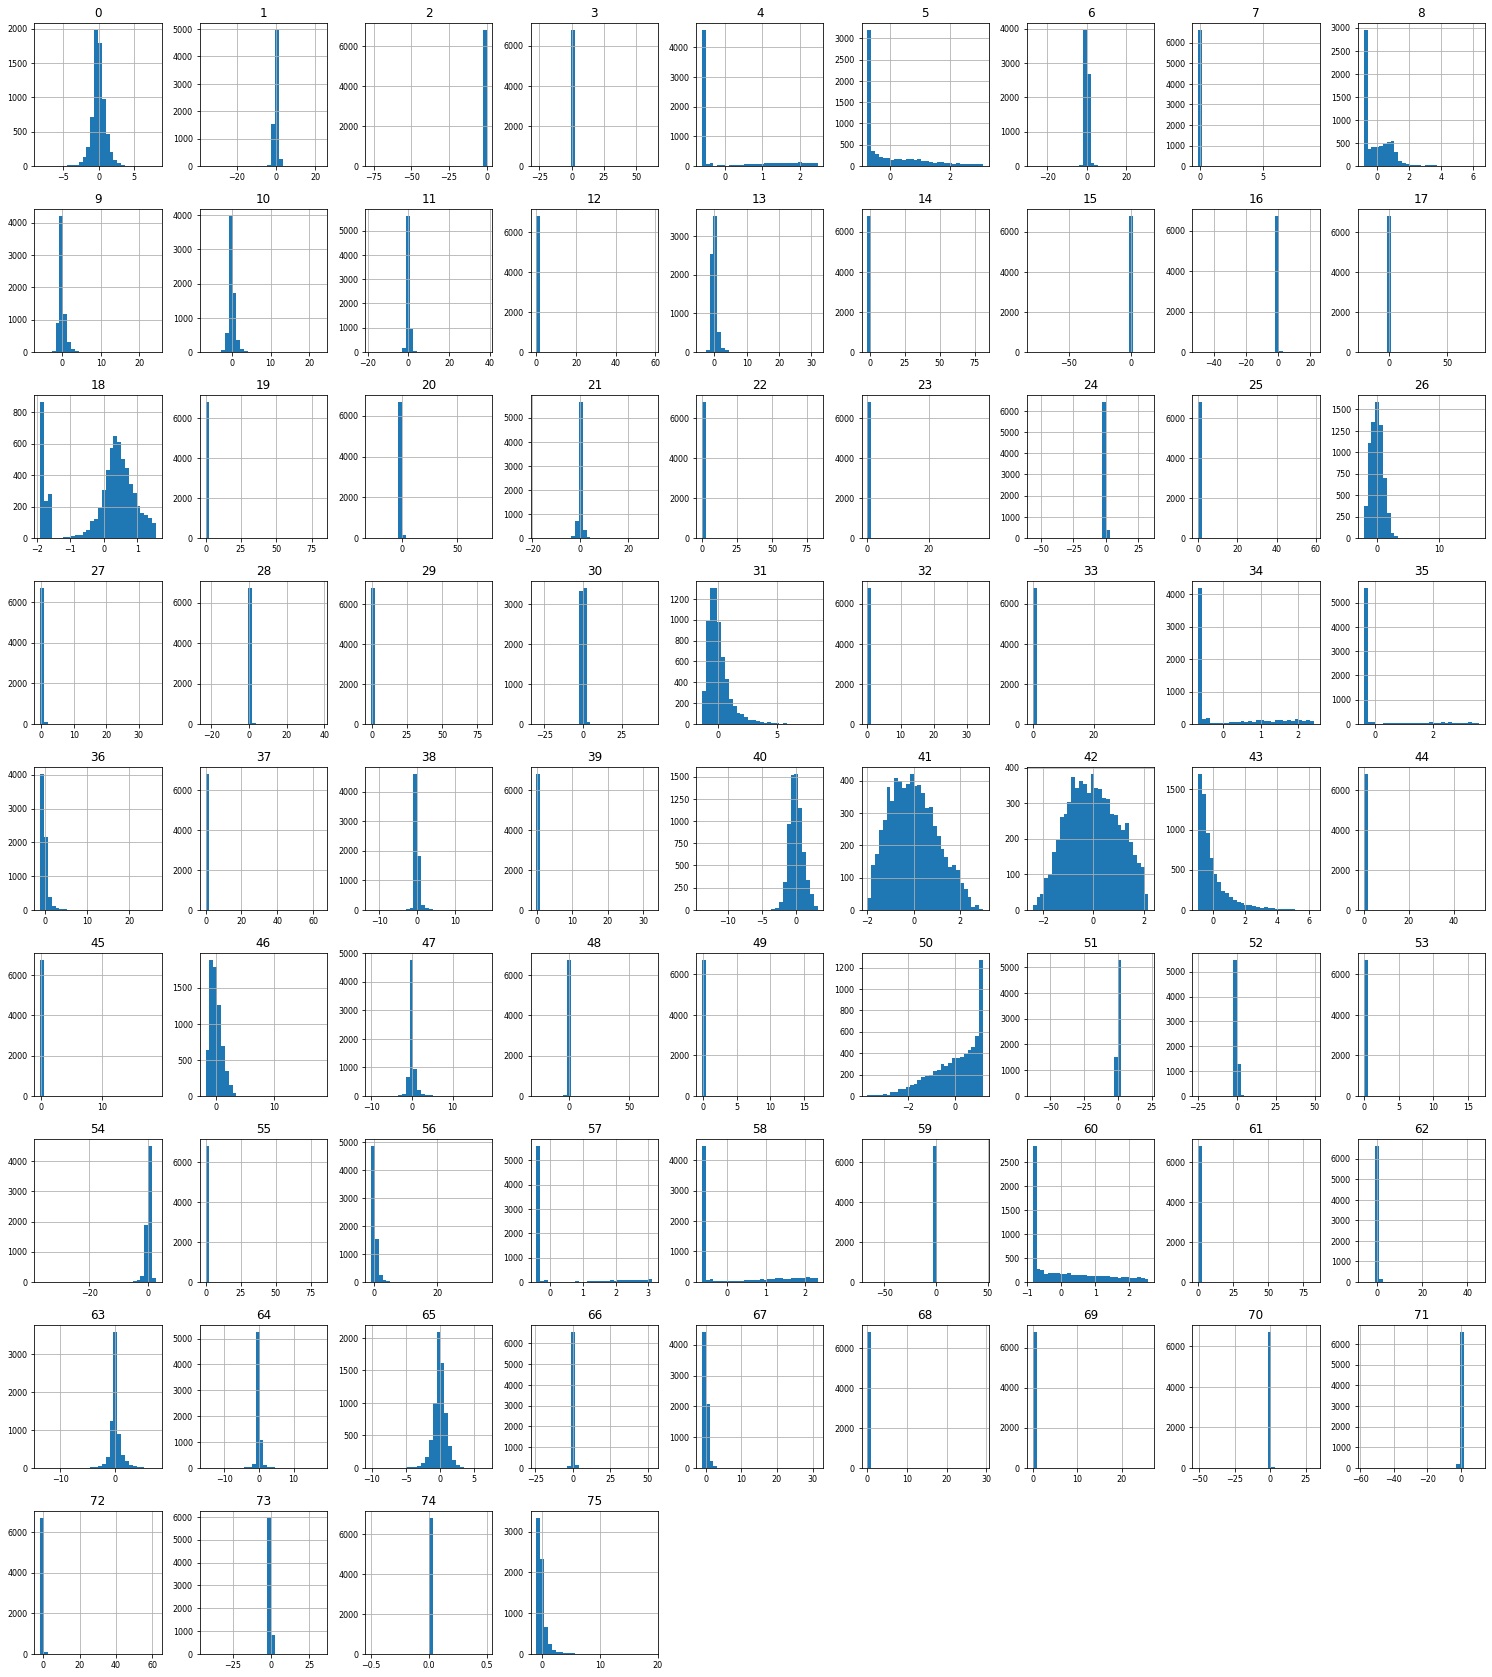

In [9]:
# Histogram of Scaled Data, just for reference
scaled_data = pd.DataFrame(x_scaled)
scaled_data.hist(figsize=(26, 30), bins=30, xlabelsize=8, ylabelsize=8); 

# Models, Random Forrest, GradBoost, Extra Tree, Stacking, XGBoost and model evaluations


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_clf = RandomForestClassifier(n_estimators=100, random_state=random_st)

forest_clf.fit(x_train, y_train)

cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(forest_clf, x_train, y_train, cv=3)


cm_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix:\n', cm_mat)

print( "Accuracy: ", accuracy_score(y_train, y_train_pred) )
print( "Precision: ", precision_score(y_train, y_train_pred) )
print( "Recall: ", recall_score(y_train, y_train_pred) )
print( "F1 score: ", f1_score(y_train, y_train_pred) )



confusion matrix:
 [[5257   18]
 [ 152   28]]
Accuracy:  0.9688359303391384
Precision:  0.6086956521739131
Recall:  0.15555555555555556
F1 score:  0.24778761061946902


One more thing we noticed from the EDA we have done. The data is very imbaalanced, with very few companies going bankrupt. So if a classifier just predcist no Bankruptcy (0), it will get a very highaccuracy of 6599/(6599+230) = 0.968, more than 96% accuracy.
So for a better model we would need to balance the tarining data set a little, by SMOTE technique.
SMOTE balances the data by generating synthetic data.


In [27]:
!pip install -U imbalanced-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 199 kB 895 kB/s eta 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [32]:
import imblearn
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state = random_st)

x_train, y_train = sm.fit_resample(x_train, y_train)

print('New balance of 1 and 0 classes (%):')
y_train.value_counts()



New balance of 1 and 0 classes (%):


1    5275
0    5275
Name: Bankrupt?, dtype: int64

In [48]:
y_train.describe()

count    13198.000000
mean         0.500000
std          0.500019
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: Bankrupt?, dtype: float64

In [49]:
x_train.describe()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,13198.000000,13198.000000,13198.000000,13198.000000,1.319800e+04,1.319800e+04,13198.000000,1.319800e+04,13198.000000,13198.000000,...,13198.000000,13198.000000,13198.000000,1.319800e+04,13198.000000,13198.000000,13198.000000,13198.000000,13198.0,13198.000000
mean,0.463531,0.603273,0.998744,0.303260,1.905985e+09,1.671209e+09,0.463856,1.003487e+07,0.074929,0.176001,...,0.313529,0.044654,0.000606,3.200571e+07,0.623797,0.833393,0.027912,0.565294,1.0,0.036053
std,0.077036,0.015398,0.009362,0.008294,3.177163e+09,2.388416e+09,0.014593,8.036271e+07,0.126502,0.030688,...,0.019449,0.035481,0.024614,4.253588e+08,0.009604,0.043846,0.013838,0.010295,0.0,0.045005
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.430745,0.597210,0.998859,0.303236,1.703326e-04,1.658379e-04,0.459813,2.810281e-04,0.000000,0.157109,...,0.311588,0.024969,0.000000,1.212721e-03,0.623222,0.835534,0.026641,0.564507,1.0,0.018174
50%,0.469995,0.601774,0.998968,0.303448,3.213149e-04,4.070000e+08,0.462295,4.350435e-04,0.000000,0.173071,...,0.314122,0.037564,0.000000,3.073000e-03,0.623724,0.839657,0.026791,0.565167,1.0,0.023735
75%,0.505187,0.609082,0.999036,0.303537,3.539553e+09,2.651561e+09,0.466215,6.387055e-04,0.131466,0.186961,...,0.316316,0.054480,0.000000,7.866387e-03,0.624068,0.841476,0.026919,0.565840,1.0,0.036793
max,1.000000,1.000000,1.000000,1.000000,9.990000e+09,9.980000e+09,1.000000,9.900000e+08,1.000000,1.000000,...,1.000000,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [12]:

# Scale or Normalize the data
#scaler = StandardScaler()
#x_scaled_sm = scaler.fit_transform(x_sm)

#x_train, x_test, y_train, y_test = train_test_split(x_scaled_sm, y_sm, test_size=0.2, random_state=random_st)


In [33]:
# Let us run the same Random Forrest model, with same parameters as before and compare the results

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=random_st)

forest_clf.fit(x_train, y_train)

cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(forest_clf, x_train, y_train, cv=3)


cm_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix:\n', cm_mat)

print( "Accuracy: ", accuracy_score(y_train, y_train_pred) )
print( "Precision: ", precision_score(y_train, y_train_pred) )
print( "Recall: ", recall_score(y_train, y_train_pred) )
print( "F1 score train: ", f1_score(y_train, y_train_pred) )

y_test_pred = forest_clf.predict(x_test)
print( "F1 score test, 100 Estimators: ", f1_score(y_test, y_test_pred) )



confusion matrix:
 [[5086  189]
 [  28 5247]]
Accuracy:  0.9794312796208531
Precision:  0.9652317880794702
Recall:  0.994691943127962
F1 score train:  0.9797404537391466
F1 score test, 100 Estimators:  0.37113402061855666


We get a Much better results with balanced data
Let us try various input Parameters for the Random Forrest 

In [34]:
# let's check Random forest performance with 10 estimators 

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=random_st)

forest_clf.fit(x_train, y_train)

cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(forest_clf, x_train, y_train, cv=3)


cm_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix:\n', cm_mat)

print( "Accuracy: ", accuracy_score(y_train, y_train_pred) )
print( "Precision: ", precision_score(y_train, y_train_pred) )
print( "Recall: ", recall_score(y_train, y_train_pred) )
print( "F1 score train: ", f1_score(y_train, y_train_pred) )

y_test_pred = forest_clf.predict(x_test)
print( "F1 score test, 10 Estimators: ", round(f1_score(y_test, y_test_pred), 5) )



confusion matrix:
 [[5087  188]
 [  80 5195]]
Accuracy:  0.9745971563981043
Precision:  0.9650752368567713
Recall:  0.9848341232227488
F1 score train:  0.9748545693375869
F1 score test, 10 Estimators:  0.38298


In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=200, random_state=random_st)

forest_clf.fit(x_train, y_train)

cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(forest_clf, x_train, y_train, cv=3)


cm_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix:\n', cm_mat)

print( "Accuracy: ", accuracy_score(y_train, y_train_pred) )
print( "Precision: ", precision_score(y_train, y_train_pred) )
print( "Recall: ", recall_score(y_train, y_train_pred) )
print( "F1 score train: ", f1_score(y_train, y_train_pred) )

y_test_pred = forest_clf.predict(x_test)
print( "F1 score test, 200 Estimators: ", round(f1_score(y_test, y_test_pred), 5) )

confusion matrix:
 [[5086  189]
 [  23 5252]]
Accuracy:  0.9799052132701421
Precision:  0.9652637382834038
Recall:  0.9956398104265403
F1 score train:  0.9802164986935423
F1 score test, 200 Estimators:  0.39583


# Randomforrest with hyperparamter tuning 

As the number of estimotrs grows beyom=nd 100, dosmn't look like we are getting much benefit.
Let us do a Exhaustive Grid Search with Cross Validation folds 2 to find out the best possible hyperparamters for 
our Target RandomForest.
Note: The following will take some time to run.

In [36]:
from sklearn.model_selection import GridSearchCV

n_estimators = [10, 50, 100, 150, 200]
max_depth = [5, 8, 10, 15]
min_samples_split = [5, 10, 15, 25, 100]
min_samples_leaf = [5, 7, 8, 10, 12] 
criterion_vals = [ 'gini', 'entropy']

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
             criterion = criterion_vals)
r_forest = RandomForestClassifier(bootstrap = True, warm_start = True, min_impurity_decrease = 0.0001, oob_score=True)

gridF = GridSearchCV(estimator=r_forest, param_grid=hyperF, cv = 2, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)


Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


In [37]:
bestF.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [38]:
# Using the best fit model from CV Grid Search

y_test_pred = bestF.best_estimator_.predict(x_test)
print( "F1 score test, for Best Fit model: ", f1_score(y_test, y_test_pred) )


F1 score test, for Best Fit model:  0.4173913043478261


In [96]:
!pip3 install xgboost

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 1.3 MB 1.0 MB/s eta 0:00:01
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


# XGBoost with early stopping 

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report, mean_squared_error


xgb_cls = XGBClassifier(max_depth = 10, sampling_method="uniform", subsample = 0.8)
xgb_cls.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric='logloss', early_stopping_rounds=2)

y_test_pred = xgb_cls.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

print('confusion matrix:\n',cm)
print( "F1 score test, XGBoost: ", round(f1_score(y_test, y_test_pred), 5) )



[0]	validation_0-logloss:0.49409
[1]	validation_0-logloss:0.37689
[2]	validation_0-logloss:0.30749
[3]	validation_0-logloss:0.25978
[4]	validation_0-logloss:0.22104
[5]	validation_0-logloss:0.19636
[6]	validation_0-logloss:0.17807
[7]	validation_0-logloss:0.16562
[8]	validation_0-logloss:0.15553
[9]	validation_0-logloss:0.14995
[10]	validation_0-logloss:0.14543
[11]	validation_0-logloss:0.14113
[12]	validation_0-logloss:0.13712
[13]	validation_0-logloss:0.13528
[14]	validation_0-logloss:0.13481
[15]	validation_0-logloss:0.13339
[16]	validation_0-logloss:0.13298
[17]	validation_0-logloss:0.13096
[18]	validation_0-logloss:0.13052
[19]	validation_0-logloss:0.13087
[20]	validation_0-logloss:0.13086
confusion matrix:
 [[1281   43]
 [  20   20]]
F1 score test, XGBoost:  0.38835


# Gradient Boosting Classifier with Early Stopping 

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth=10, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gb.n_estimators = n_estimators
    gb.fit(x_train, y_train)
    y_test_pred = gb.predict(x_test)
    val_error = mean_squared_error(y_test, y_test_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

            
print( "F1 score test, Gradient Boost: ", round(f1_score(y_test, y_test_pred), 5) )


F1 score test, Gradient Boost:  0.2963


In [43]:
min_val_error

0.06964809384164222

# Extra Tree Classifier

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

xtra_clf = ExtraTreesClassifier(n_estimators=200, random_state=random_st, min_samples_leaf = 5, max_depth = 10)

xtra_clf.fit(x_train, y_train)

cross_val_score(xtra_clf, x_train, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(xtra_clf, x_train, y_train, cv=3)


cm_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix:\n', cm_mat)

print( "Accuracy: ", accuracy_score(y_train, y_train_pred) )
print( "Precision: ", precision_score(y_train, y_train_pred) )
print( "Recall: ", recall_score(y_train, y_train_pred) )
print( "F1 score train: ", f1_score(y_train, y_train_pred) )

y_test_pred = xtra_clf.predict(x_test)
print( "F1 score test, Extra Classifier: ", round(f1_score(y_test, y_test_pred), 5) )


confusion matrix:
 [[4744  531]
 [ 274 5001]]
Accuracy:  0.923696682464455
Precision:  0.9040130151843818
Recall:  0.9480568720379147
F1 score train:  0.9255112427130563
F1 score test, Extra Classifier:  0.28571


# Stacking with deslib, KNORAE

In [1]:
!pip install deslib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 158 kB 4.6 MB/s eta 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [45]:
# Stacking, layers of estimators

from deslib.des.knora_e import KNORAE

# Train a pool of 15 classifiers
pool_classifiers = RandomForestClassifier(n_estimators=15)
pool_classifiers.fit(x_train, y_train)

# Initialize the DES model
knorae = KNORAE(pool_classifiers)

# Train 
knorae.fit(x_train, y_train)

# Predict new examples:
y_test_pred = knorae.predict(x_test)

print( "F1 score test, Stacking: ", round(f1_score(y_test, y_test_pred), 5) )



F1 score test, Stacking:  0.41176


Final Analysis:
When using highly imbalanced training data, it is better to use some algorithms like SMOTE to balance the data out before fitting the model.
This ensures a model that just predicts the dominant target value (in this case not bankrupt) won't be adopted. This would avoid the huge bias the training data has and prepare the model better for real world data.
In our Analysis, we found that a Random Forrest classifier with HyperParamter tuning (using CV) provides the best test F1 score. Our evaluation metrics is F1 score here, this is an assumption we have made.
